In [1]:
import pandas as pd
import glob
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow 
import autokeras as ak

In [2]:
import tensorflow

In [3]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "../raw_data/Test/*.txt"))))

In [37]:
pd.read_csv('../raw_data/Test/results1.txt').head(50)

,time,voltage,curr_density,SOC,SOC_est,temp
0,0.0,3.708909,-29.5,32.000000,28.334920,296.000000
1,0.5,3.708570,-29.5,31.985983,28.323134,296.006594
2,1.0,3.708260,-29.5,31.971966,28.311349,296.012895
3,1.5,3.707968,-29.5,31.957949,28.299563,296.019220
4,2.0,3.707689,-29.5,31.943932,28.287778,296.025567
5,2.5,3.707422,-29.5,31.929915,28.275992,296.031933
6,3.0,3.707163,-29.5,31.915898,28.264207,296.038317
7,3.5,3.706913,-29.5,31.901881,28.252421,296.044715
8,4.0,3.706669,-29.5,31.887865,28.240635,296.051127
9,4.5,3.706433,-29.5,31.873848,28.228850,296.057551


In [42]:
X=df.drop(columns=['SOC', 'SOC_est'])
y = df.SOC
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=False)

In [43]:
y_test

482     38.766950
483     38.752933
484     38.738916
485     38.724899
486     38.710882
          ...    
996     73.796179
997     73.778361
998     73.760543
999     73.742725
1000    73.724906
Name: SOC, Length: 29510, dtype: float64

Coefficients: 
 [ 2.38803775e-02  1.39352850e+02 -2.82505078e-01 -1.73159562e-01]
Mean squared error: 67.83
Coefficient of determination: 0.84


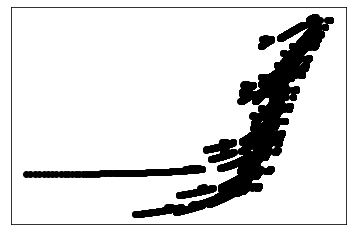

In [44]:
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test['voltage'], y_test,  color='black')
#plt.plot(X_test['voltage'], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [6]:
X_test

,time,voltage,curr_density,temp
734,367.0,3.012058,-29.50,288.283766
335,167.5,3.709120,-14.75,311.891725
284,142.0,3.457124,-14.75,311.331105
140,70.0,3.701728,-14.75,265.802300
76,38.0,3.784274,-29.50,323.397874
...,...,...,...,...
48,24.0,3.635964,-29.50,278.390773
717,358.5,3.806399,-29.50,288.186784
68,34.0,3.871705,-29.50,308.301898
736,368.0,3.555800,-29.50,302.251302


In [7]:
y_test

734     2.234668
335    28.231656
284     7.589079
140    30.598304
76     51.934713
         ...    
48     21.327187
717    65.472967
68     70.046848
736    15.206656
800    26.309575
Name: SOC, Length: 29510, dtype: float64

In [8]:
import autokeras

In [47]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=30, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(X_train, y_train, epochs=30)
# Predict with the best model.
predicted_y = reg.predict(X_test)
# Evaluate the best model with testing data.
print(reg.evaluate(X_test, y_test))


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
structured_data...|True              |?                 
structured_data...|2                 |?                 
structured_data...|False             |?                 
structured_data...|0                 |?                 
structured_data...|32                |?                 
structured_data...|32                |?                 
regression_head...|0                 |?                 
optimizer         |adam              |?                 
learning_rate     |0.001             |?                 

Epoch 1/30
1722/1722 [==============================] - 3s 2ms/step - loss: 594.0006 - mean_squared_error: 594.0006 - val_loss: 56.7067 - val_mean_squared_error: 56.7067
Epoch 2/30
1722/1722 [==============================] - 3s 2ms/step - loss: 24.2680 - mean_squared_error: 24.2680 - val_loss: 33.6360 - val_mean_squared_error: 33.6360
Epoch 3/30
1722/1722 [==============================] - 3s 2ms/s

KeyboardInterrupt: 

In [16]:
model = reg.export_model()

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 4)                 0         
_________________________________________________________________
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 32)                160       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [23]:
y_test[0:10]

734     2.234668
335    28.231656
284     7.589079
140    30.598304
76     51.934713
595    25.183032
850    65.397638
443    34.313599
901    27.488913
518    49.262339
Name: SOC, dtype: float64

In [22]:
print(predicted_y[0:10])

[[ 2.3625016]
 [27.943493 ]
 [ 7.3220615]
 [31.623951 ]
 [53.47083  ]
 [24.64329  ]
 [66.385056 ]
 [35.234634 ]
 [26.739157 ]
 [50.50332  ]]


In [24]:
print(type(model))

<class 'tensorflow.python.keras.engine.functional.Functional'>


In [25]:
model.save("model_autokeras", save_format="tf")

INFO:tensorflow:Assets written to: model_autokeras/assets


In [27]:
from tensorflow.keras.models import load_model
loaded_model = load_model("model_autokeras", custom_objects=ak.CUSTOM_OBJECTS)

In [29]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 4)                 0         
_________________________________________________________________
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 32)                160       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [30]:
predicted_y = loaded_model.predict(tf.expand_dims(X_test, -1))

<IPython.core.display.Javascript object>

In [40]:
predicted_y

array([[ 2.3625016],
       [27.943493 ],
       [ 7.3220615],
       ...,
       [71.26073  ],
       [15.031337 ],
       [24.264    ]], dtype=float32)

In [41]:
y_test

910    38.328538
806    70.225422
584    72.337233
152    84.514197
854    66.326373
         ...    
427    28.537852
591    51.239110
809    58.183365
240    19.897461
798    71.337571
Name: SOC, Length: 29510, dtype: float64

In [45]:
# It tries 10 different models.
reg1 = ak.StructuredDataRegressor(max_trials=30, overwrite=True)
# Feed the structured data regressor with training data.
reg1.fit(X_train, y_train, epochs=30)
# Predict with the best model.
predicted_y = reg1.predict(X_test)
# Evaluate the best model with testing data.
print(reg1.evaluate(X_test, y_test))


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
structured_data...|True              |?                 
structured_data...|2                 |?                 
structured_data...|False             |?                 
structured_data...|0                 |?                 
structured_data...|32                |?                 
structured_data...|32                |?                 
regression_head...|0                 |?                 
optimizer         |adam              |?                 
learning_rate     |0.001             |?                 

Epoch 1/30
1722/1722 [==============================] - 6s 3ms/step - loss: 608.4999 - mean_squared_error: 608.4999 - val_loss: 49.2679 - val_mean_squared_error: 49.2679
Epoch 2/30
1722/1722 [==============================] - 5s 3ms/step - loss: 33.9026 - mean_squared_error: 33.9026 - val_loss: 29.7198 - val_mean_squared_error: 29.7198
Epoch 3/30
1722/1722 [==============================] - 5s 3ms/s

KeyboardInterrupt: 

In [46]:
pd.read_csv('../raw_data/Test/results1.txt')

,9.69550154328963,3.7921692459501,281,0,9.69550154328963.1,3.79228474555243,280.999098442144,0.5,9.69550154328963.2,3.79239109927778,...,281.844228346951,289.5,10.3945904226416.5,3.77501521248019,281.840714586377,290,-36.0478646909592,3.68923975669622,281.847398314258,290.5
0,-3.305738,4.004143,320,0,-3.305738,4.004105,320.000081,0.5,-3.305738,4.004069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
